In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [5]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [6]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

Análisis exploratorio de datos (EDA)

Preguntas de exploración
1. Valores que influyen en los salarios de los profesionales
* ¿Cuánto es el salario anual promedio de acuerdo al género?
* ¿Cuánto es el salario anual promedio de acuerdo al nivel de educación?
* ¿Cuánto es el salario anual promedio de acuerdo a la empresa donde se labora?

2. Valores que influyen en la participación de estos profesionales
* ¿Cuál es el % de profesionales segun su raza?
* ¿Cuál es la participacion de profesionales segun su genero?
* ¿Cuál es el % de profesionales segun su educación profesional?


2. Valores que influyen en el porcentaje de participación de estos profesionales

¿Qué % de estos profesionales son de la raza blanca, negra y mestiza?

In [7]:
df_part_race = df['Race'].value_counts()
df_part_race

No especificado    33447
Asian               9975
White               6701
Hispanic             982
Two Or More          691
Black                618
Name: Race, dtype: int64

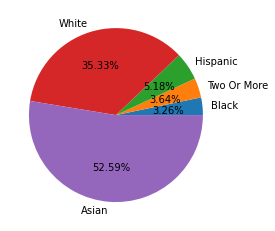

In [8]:
Race = ['Black','Two Or More','Hispanic','White','Asian']
value = [618,691,982,6701, 9975] 
plt.pie(x=value, labels=Race, autopct='%.2f%%')
plt.show()

¿Cuál es el % de profesionales segun su genero?

In [26]:
df_part_gender = df['gender'].value_counts()
df_part_gender

Male               29754
No especificado    16091
Female              6242
Other                327
Name: gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='gender'>

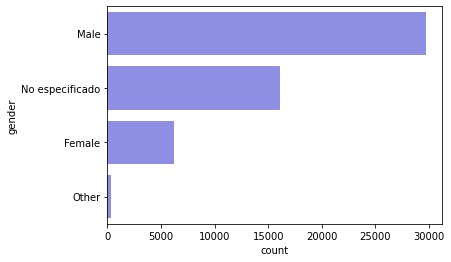

In [23]:
gender_ord = df['gender'].value_counts().sort_values(ascending=False)
order = gender_ord.index
sns.countplot(data=df, y='gender', color="#8080f0", order=order)

In [ ]:
#npkmn = gender_ord.values.sum()
#for i, contador in enumerate(gen_cnt):
   #pcnt = '{:0.1f}%'.format(100*contador/npkmn)
   #plt.text(contador-20, i, pcnt, va ='center')

¿Cuál es el % de profesionales segun su educación profesional?

In [43]:
part_educacion = df["Education"].value_counts().reset_index().rename(columns={'index':'Titulo'})
part_educacion

,Titulo,Education
0,No especificado,26849
1,Master's Degree,12976
2,Bachelor's Degree,10778
3,PhD,1264
4,Some College,281
5,Highschool,266


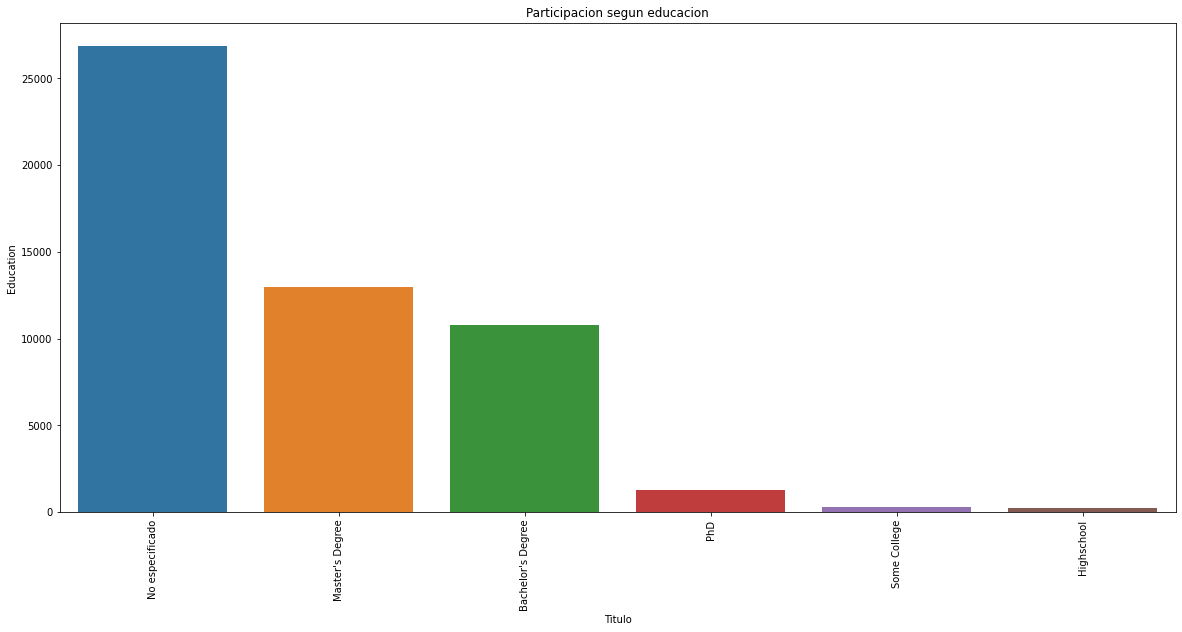

In [46]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
plt.title("Participacion segun educacion")
sns.barplot(x='Titulo',y='Education',data=part_educacion)
plt.show()

In [35]:
#Como observamos que solo es una fila aplicamos replace
df = df.replace(to_replace='Company: MSFT', value='Microsoft')